## import
* 관용적으로 sns라는 별칭 사용
* matplotlib.pyplot과 호환

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 전역 설정

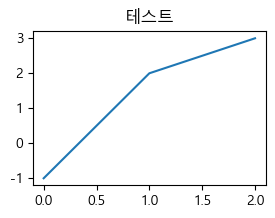

In [2]:
# ----------------------------------
# font 전역설정
# ----------------------------------
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))

# ----------------------------------
# figsize 전역설정
# ----------------------------------
plt.rc('figure', figsize=(4,3))

## 샘플 데이터 준비

In [3]:
import seaborn as sns
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

## Seaborn 사용법
* `sns.그래프(x축데이터, y축데이터)`
* `sns.그래프(data=데이터프레임, x='x축컬럼명', y='축컬럼명')`
>* 주요 파라미터
>  * `hue` = '그룹기준컬럼명'
>  * `estimator` = 집계함수(bar그래프)

## barplot

In [ ]:
# --------------------
# tips
# --------------------

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


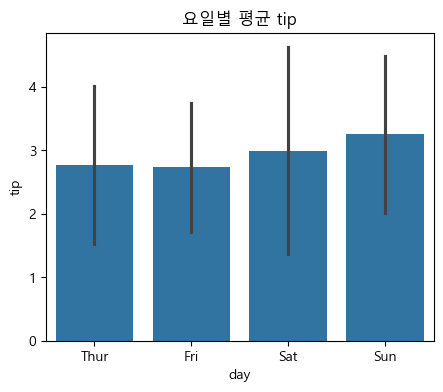

In [5]:
# ------------------------
# 요일별 tip 평균
# ------------------------

plt.figure(figsize=(5, 4))
sns.barplot(data=tips, x='day', y='tip', errorbar='sd')  # ci='sd' → 표준편차로 오차막대
plt.title('요일별 평균 tip')
plt.show()

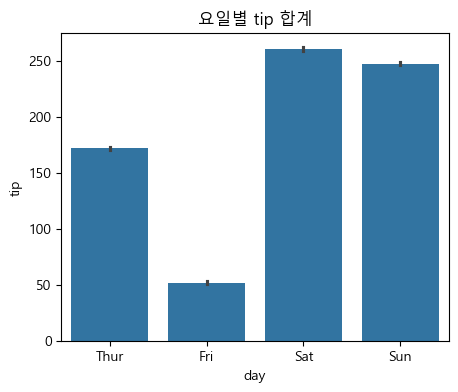

In [8]:
# ------------------------
# 요일별 tip 합계
# ------------------------

# 요일별 tip 합계 시각화
plt.figure(figsize=(5, 4))
sns.barplot(data=tips, x='day', y='tip', estimator=sum, errorbar='sd')
plt.title('요일별 tip 합계')
plt.show()

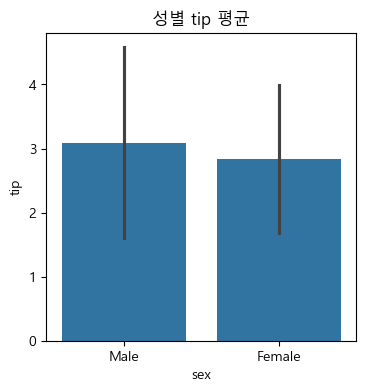

In [11]:
# -----------------------------------
# 성별 팁 평균
# -----------------------------------

# 성별 tip 평균
plt.figure(figsize=(4, 4))
sns.barplot(data=tips, x='sex', y='tip', errorbar='sd')
plt.title('성별 tip 평균')
plt.show()

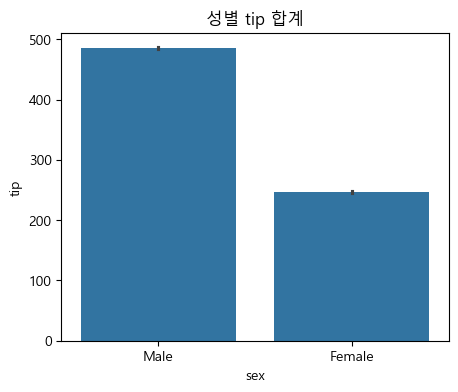

In [12]:
# -----------------------------------
# 성별 팁 합계
# -----------------------------------

plt.figure(figsize=(5, 4))
sns.barplot(data=tips, x='sex', y='tip', estimator=sum, errorbar='sd')
plt.title('성별 tip 합계')
plt.show()

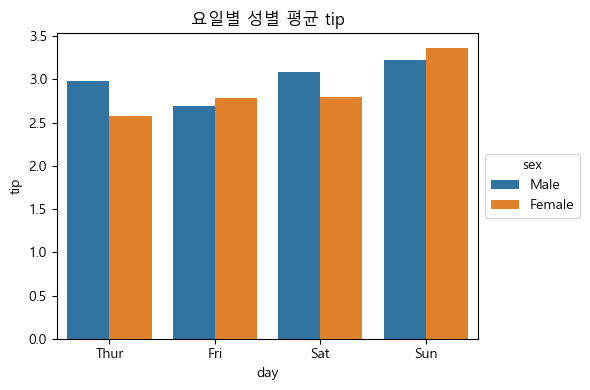

In [16]:
# -----------------------------------
# 요일별 평균을 그린다.
#   - 각 막대를 성별로 구분한다(중첩막대)
#   - hue 옵션 사용
# -----------------------------------

plt.figure(figsize=(6, 4))
sns.barplot(data=tips, x='day', y='tip', hue='sex', errorbar=None)  # 검정 오차막대 제거

plt.title('요일별 성별 평균 tip')
plt.legend(title='sex', loc='center left', bbox_to_anchor=(1, 0.5))  # 범례를 오른쪽 밖으로 이동
plt.tight_layout()
plt.show()

## scatterplot
* hue : 색깔로 구분
* size : 데이터의 크기 표현

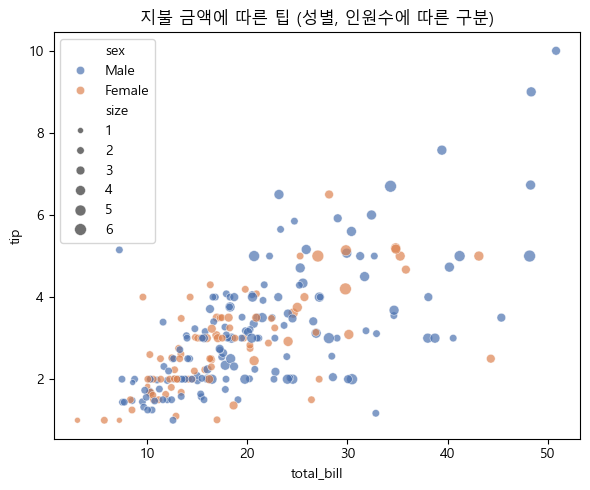

In [17]:
# -----------------------------------
# 지불금액(total_bill)에 따른 팁(tip)
#   - 점의 색으로 성별 구분
#   - 점의 크기로 테이블 인원수(size) 구분
# -----------------------------------

plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='sex',
    size='size',
    palette='deep',
    alpha=0.7
)
plt.title('지불 금액에 따른 팁 (성별, 인원수에 따른 구분)')
plt.tight_layout()
plt.show()

## regplot
* 회귀 시각화
    * 산점도와 함께 선형회귀선을 그려줌
    * 두 변수 간의 관계를 시각적으로 분석할 때 유용
* 그래프 스타일 
    * scatter_kws : 산점도 스타일
    * line_kws : 회귀선 스타일

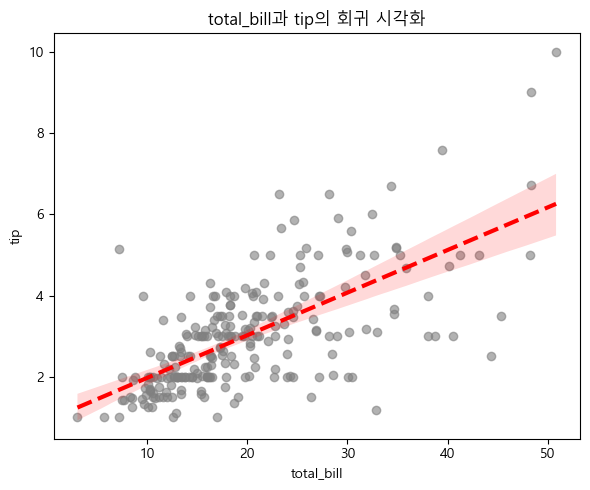

In [18]:
# -----------------------------
# total_bill과 tip의 산점도와 선형회귀선
# 산점도 스타일 : scatter_kws
# 회귀선 스타일 : lin_kws
# -----------------------------

plt.figure(figsize=(6, 5))
sns.regplot(
    data=tips,
    x='total_bill',
    y='tip',
    scatter_kws={'color': 'gray', 'alpha': 0.6},
    line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 3}
)
plt.title('total_bill과 tip의 회귀 시각화')
plt.tight_layout()
plt.show()

## barplot

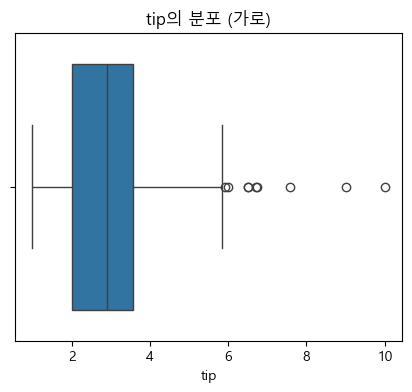

In [19]:
# -----------------------------
# tip의 분포(가로모양)
# -----------------------------

plt.figure(figsize=(5, 4))
sns.boxplot(data=tips, x='tip')  # x축 방향 → 가로 박스플롯
plt.title('tip의 분포 (가로)')
plt.show()

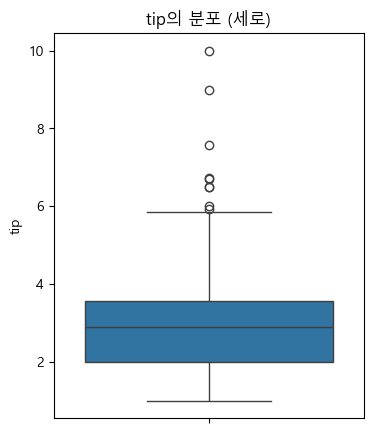

In [20]:
# -----------------------------
# tip의 분포(세로모양)
# -----------------------------

plt.figure(figsize=(4, 5))
sns.boxplot(data=tips, y='tip')  # y축 방향 → 세로 박스플롯
plt.title('tip의 분포 (세로)')
plt.show()

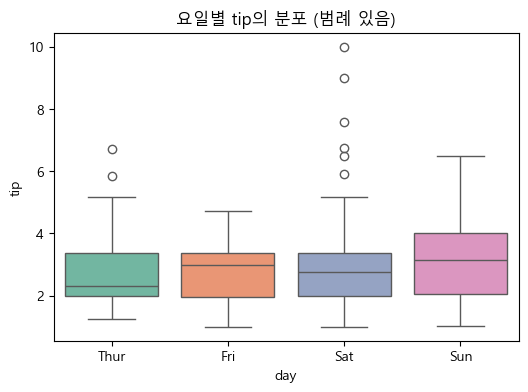

In [21]:
# -----------------------------
# 요일별 tip의 분포
# -----------------------------

plt.figure(figsize=(6, 4))
sns.boxplot(data=tips, x='day', y='tip', hue='day', palette='Set2')
plt.title('요일별 tip의 분포 (범례 있음)')
plt.show()

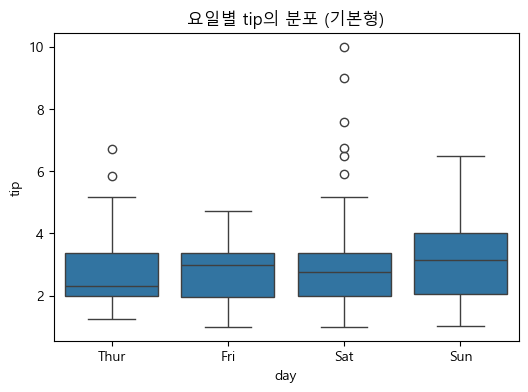

In [22]:
# -----------------------------
# 요일별 tip의 분포
# -----------------------------

plt.figure(figsize=(6, 4))
sns.boxplot(data=tips, x='day', y='tip')
plt.title('요일별 tip의 분포 (기본형)')
plt.show()

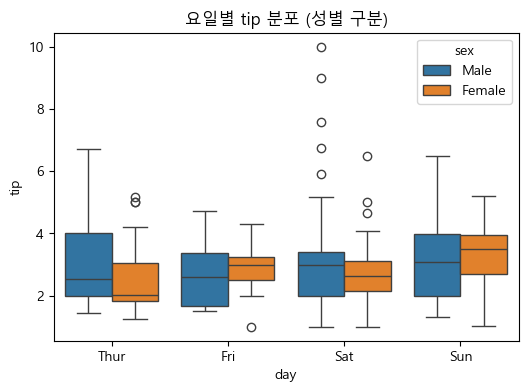

In [23]:
# -----------------------------
# 요일별 tip의 분포를 성별로 구분
# -----------------------------

plt.figure(figsize=(6, 4))
sns.boxplot(data=tips, x='day', y='tip', hue='sex')
plt.title('요일별 tip 분포 (성별 구분)')
plt.show()

## violinplot

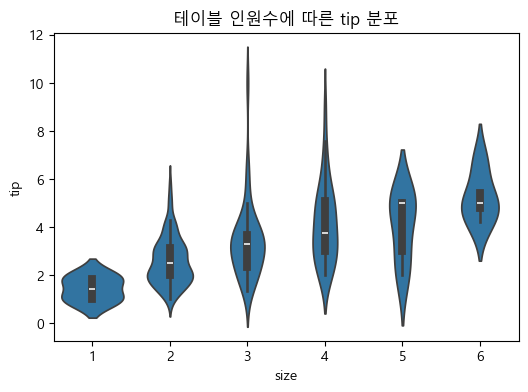

In [25]:
# ---------------------
# 테이블 인원에 따른 팁의 분포
# ---------------------

plt.figure(figsize=(6, 4))
sns.violinplot(data=tips, x='size', y='tip')
plt.title('테이블 인원수에 따른 tip 분포')
plt.show()

In [26]:
# -------------
# titanic
# -------------

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## histplot
* kde(커널밀도추정)
    * 데이터의 분포를 부드럽게 그린 곡선 형태의 그래프

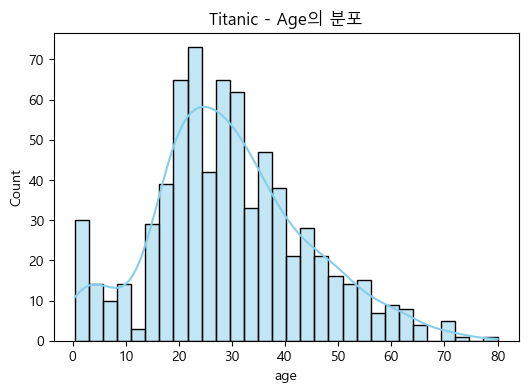

In [31]:
# ---------------------
# titanic - age의 분포 (히스토그램)
# ---------------------

# age 컬럼 시각화
plt.figure(figsize=(6, 4))
sns.histplot(data=titanic, x='age', bins=30, kde=True, color='skyblue')
plt.title('Titanic - Age의 분포')
plt.show()

## countplot
* 데이터의 빈도수 시각화
* `sns.histplot(data=데이터프레임, x='범주형컬럼')`

In [32]:
# ---------------------
# titanic - who의 빈도수
# ---------------------

titanic['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

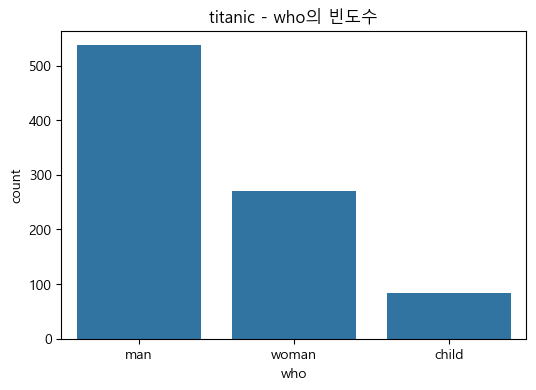

In [33]:
# ---------------------
# titanic - who의 빈도수 시각화
# ---------------------

plt.figure(figsize=(6, 4))
sns.countplot(data=titanic, x='who')
plt.title('titanic - who의 빈도수')
plt.show()

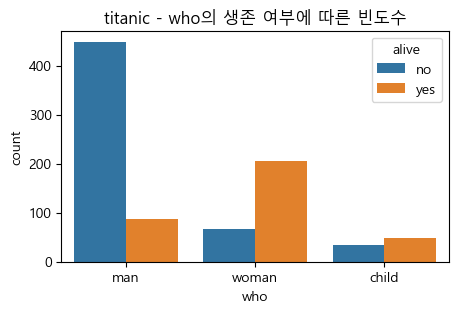

In [36]:
# ---------------------
# titanic - who의 빈도수 시각화 결과에서
# 각 범주를 한번 더 나누기 ()
# ---------------------

plt.figure(figsize=(5, 3))
sns.countplot(data=titanic, x='who', hue='alive')
plt.title('titanic - who의 생존 여부에 따른 빈도수')
plt.show()

In [37]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## heatmap

In [39]:
# 상품군 리스트
categories = ['의류', '가전', '식품', '생활용품', '뷰티', '스포츠', '도서']

# 월 리스트
months = ['1월', '2월', '3월', '4월', '5월', '6월', 
          '7월', '8월', '9월', '10월', '11월', '12월']

# 랜덤한 매출 데이터 생성
np.random.seed(42)
data = np.random.randint(50, 500, size=(len(categories), len(months)))

# DataFrame 생성
df_sales = pd.DataFrame(data, index=categories, columns=months)
df_sales

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
의류,152,485,398,320,156,121,238,70,152,171,264,380
가전,137,422,149,409,201,180,199,358,307,393,463,343
식품,435,241,493,326,210,363,71,302,285,394,98,108
생활용품,219,237,320,239,495,224,495,100,413,104,293,369
뷰티,180,356,184,70,378,216,323,437,138,365,63,291
스포츠,314,395,102,435,389,141,416,493,477,313,480,84
도서,255,130,469,99,409,437,51,439,103,155,309,359


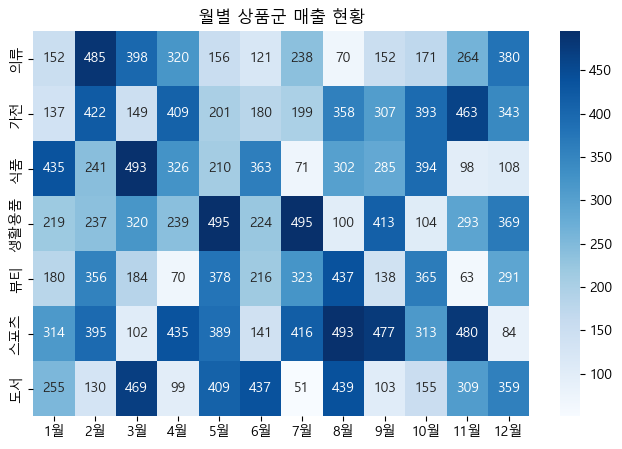

In [42]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_sales, annot=True, fmt='d', cmap='Blues')
plt.title('월별 상품군 매출 현황')
plt.show()

## pairplot
* 수치형 변수간의 관계를 한눈에 시각화
    * 수치형 변수들 간의 조합별 scatterplot, 히스토그램/kde를 행열 형태로 시각화
* cmap : https://seaborn.pydata.org/tutorial/color_palettes.html

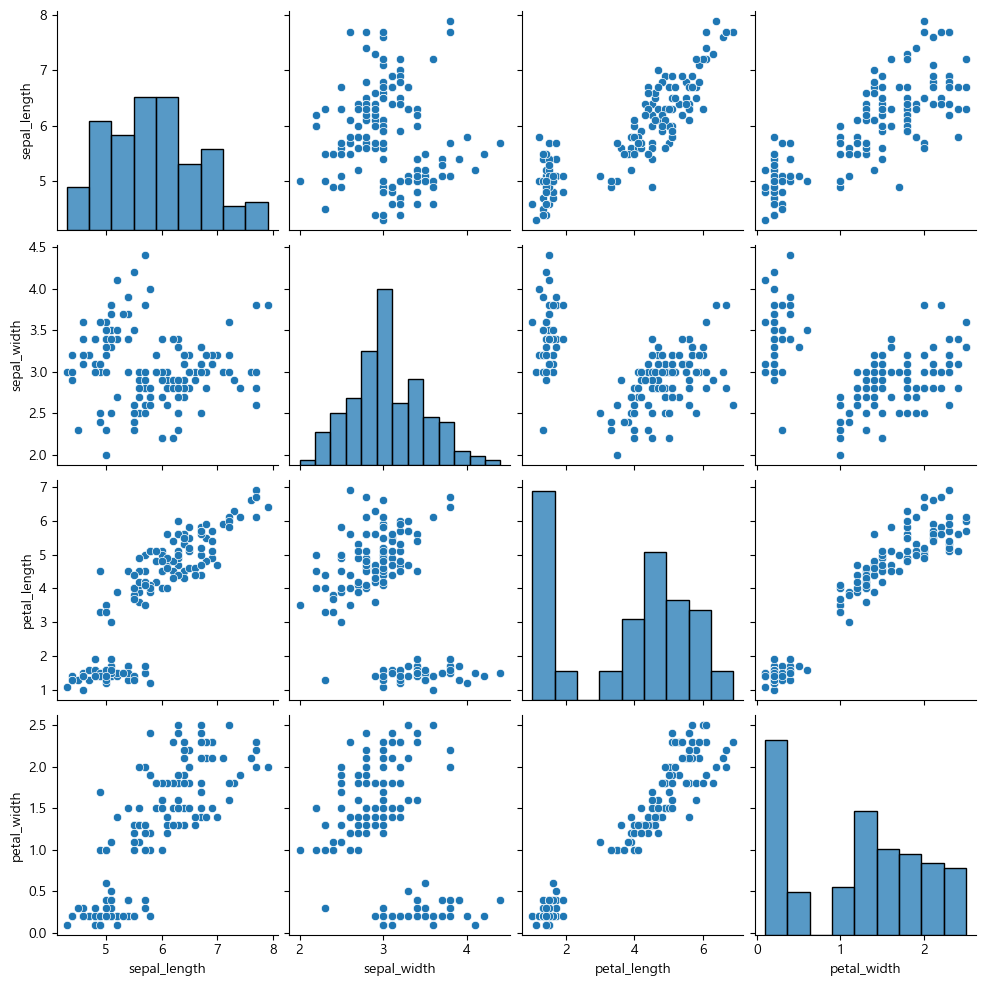

In [46]:
sns.pairplot(data=iris)  # 또는 palette="husl", "pastel" 등 다양한 colormap 사용 가능
plt.show()

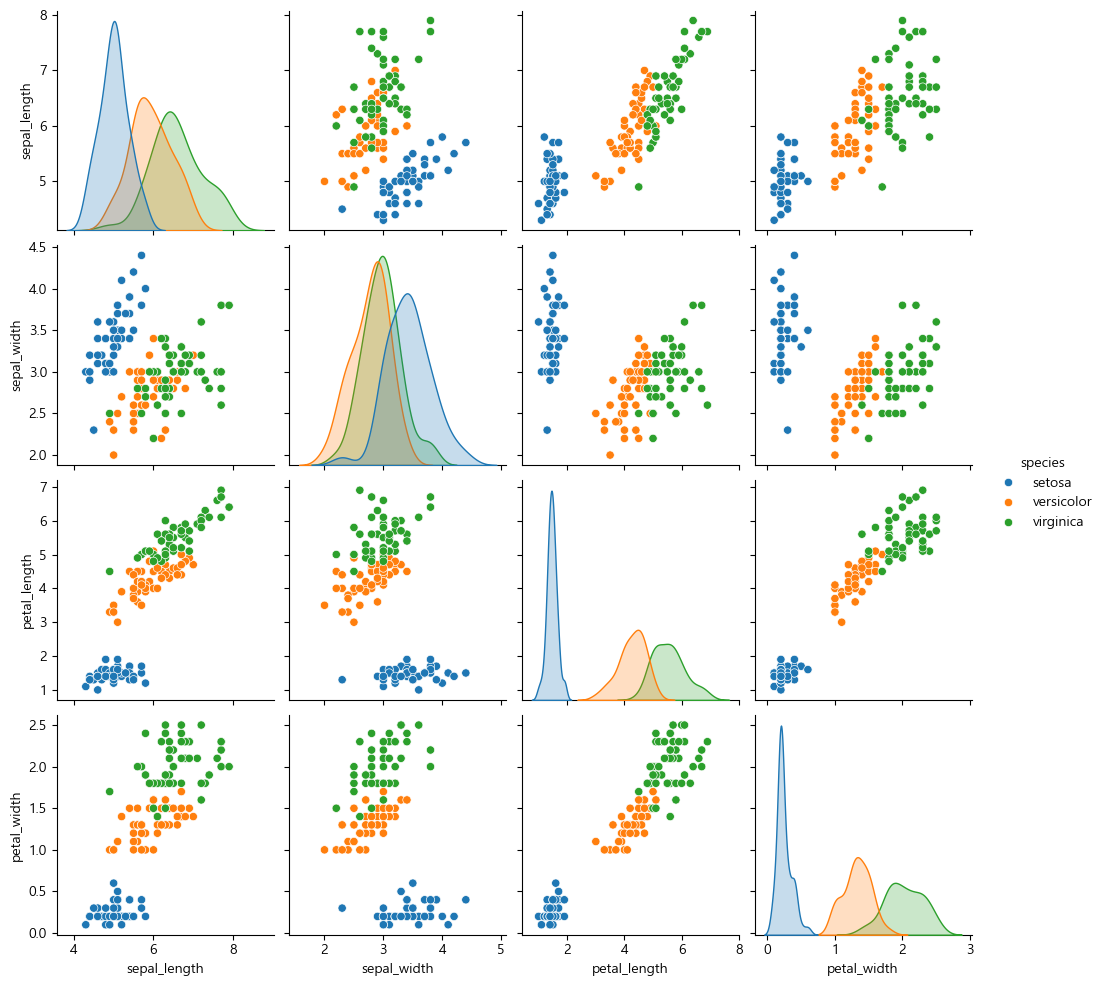

In [ ]:
custom_palette = {
    "setosa": "#1f77b4",
    "versicolor": "#ff7f0e",
    "virginica": "#2ca02c"
}

sns.pairplot(data=iris, hue="species", palette=custom_palette)
#sns.pairplot(data=iris, hue="species", palette=palette="Set1")

plt.show()